In [1]:
#pip install eli5

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer

from sklearn import metrics
from sklearn.metrics import classification_report, f1_score
#from cm import plot_confusion_matrix
#from ds_utils.metrics import plot_confusion_matrix

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

# import eli5

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Logistic Regression Analyses

In [4]:
wvs_w6 = pd.read_csv('../data/Evaluating_Happiness/w6_modeling.csv', low_memory=False)
wvs_w6.head()

,v2,country,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v24,v25,v26,v27,v30,v32,v33,v34,v44,v45,v47,v48,v49,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74r,v75,v76,v77,v78,v79,v80,v82,v83,v84,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v113,v114,v115,v116,v117,v119,v120,v121,v122,v123,v124,v126,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v143,v144g,v147,v150,v151,v152,v153,v154,v155,v170,v171,v173,v174,v176,v177,v179,v180,v181,v182,v183,v184,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v202,v203,v204,v205,v207,v208,v209,v210,v211,v213,v214,v216,v225,v229,v237,v238,v239,v240,v242,v242g,v248,v258,s018,s019,v262
0,12,ALG,1,1,1,3,1,1,2,1,1,1,2,2,2,2,2,2,2,1,2,2,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,7,4,6,0,10,2,3,1,3,3,1,1,1,1,1,1,1,1,1,1,2,1,2,3,3,2,2,2,4,8,7,6,8,7,5,2,2,2,2,2,2,1,3,3,2,2,2,4,3,3,3,2,3,4,4,3,4,3,8,5,6,9,3,4,7,6,7,2,5,1,1,1,10,1,2,2,2,2,2,2,5,5,5,1,2,2,3,2,2,3,3,3,3,7,8,3,5,6,9,6,6,1,1,1,1,3,1,6,5,1,1,2,2,2,2,6,1,4,5,1,21,1,7,1.0,0.833333,1.25,2014
1,12,ALG,1,2,3,4,2,2,2,2,2,1,2,2,2,2,2,2,2,1,2,1,0,0,0,0,0,0,0,2,1,1,1,2,1,2,3,2,6,8,6,0,10,2,1,2,3,4,3,1,1,1,2,2,3,2,1,1,3,2,2,2,2,2,1,2,3,7,5,5,4,4,6,1,3,3,3,3,3,1,1,1,2,3,1,2,2,3,2,2,3,2,2,3,3,2,8,8,8,9,2,6,4,2,4,1,5,1,2,1,10,1,1,1,2,1,2,2,5,5,1,5,2,3,4,2,2,2,2,2,2,4,8,4,6,4,8,3,4,7,1,1,1,1,1,3,5,1,2,2,2,2,3,6,2,3,6,2,24,1,7,1.0,0.833333,1.25,2014
2,12,ALG,1,3,2,4,2,1,2,2,2,2,2,1,2,1,2,1,2,1,2,1,0,0,0,0,0,0,0,2,1,2,3,1,1,1,1,1,6,8,6,0,6,2,4,1,2,1,4,1,2,2,2,1,2,1,1,4,1,2,2,2,2,2,2,2,2,7,7,7,5,7,5,1,3,3,4,4,4,3,2,2,2,4,3,2,2,2,4,3,2,3,2,4,2,2,7,4,8,3,3,6,9,5,6,1,5,1,2,1,6,2,3,1,2,2,3,3,5,5,5,5,2,3,2,3,2,3,3,3,3,4,7,5,5,5,5,5,5,1,1,1,1,4,1,4,5,1,1,3,2,4,2,3,1,4,6,2,26,2,5,1.0,0.833333,1.25,2014
3,12,ALG,1,1,3,4,3,1,2,1,2,2,2,2,1,2,2,2,1,1,2,2,0,0,0,0,0,0,0,2,2,1,1,1,2,2,2,2,6,8,6,0,6,2,1,3,1,4,3,1,1,1,1,1,2,3,2,3,1,1,2,2,3,1,2,2,2,9,5,6,4,6,8,1,3,3,2,2,3,2,3,4,2,4,2,3,3,4,2,2,3,1,2,4,3,2,7,9,5,5,7,3,8,7,8,2,5,1,2,1,10,2,3,4,1,2,2,2,5,5,1,5,2,3,3,3,2,2,3,3,3,6,6,3,5,5,7,4,6,1,1,1,1,1,1,1,1,1,1,2,2,2,2,1,4,4,5,2,28,2,6,1.0,0.833333,1.25,2014
4,12,ALG,1,1,1,2,1,1,1,3,2,1,2,2,2,2,1,2,2,2,2,2,0,0,0,0,0,0,0,2,1,1,1,1,1,3,2,2,6,6,1,3,4,2,1,2,3,4,2,1,2,1,1,2,5,1,2,3,4,3,2,2,3,1,2,2,2,8,4,7,4,6,6,2,2,3,4,2,3,2,3,3,2,3,2,3,3,3,3,3,2,4,3,2,3,2,8,4,7,3,3,8,6,5,6,2,5,1,1,1,10,2,3,2,2,2,3,3,5,5,5,5,2,3,3,4,2,3,3,3,3,6,2,4,4,6,6,6,5,7,1,1,1,3,1,4,5,1,1,2,2,3,2,3,2,3,7,2,35,2,3,1.0,0.833333,1.25,2014


### Step 1: Set up variables

In [5]:
# put identifiers and weights in their own list
id_vars = wvs_w6.columns[0:2].tolist()
id_vars

['v2', 'country']

In [6]:
weight_vars = ['country', 'v258', 's018', 's019']
weight_vars

['country', 'v258', 's018', 's019']

**Define categorical variables and use one-hot-encoding**

In [7]:
# define predictor variables
X = wvs_w6.drop(['v10', 'v242g'], axis = 1)
X = X.drop(['v258', 's018', 's019'], axis = 1)
X.head()

,v2,country,v4,v5,v6,v7,v8,v9,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v24,v25,v26,v27,v30,v32,v33,v34,v44,v45,v47,v48,v49,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74r,v75,v76,v77,v78,v79,v80,v82,v83,v84,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v113,v114,v115,v116,v117,v119,v120,v121,v122,v123,v124,v126,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v143,v144g,v147,v150,v151,v152,v153,v154,v155,v170,v171,v173,v174,v176,v177,v179,v180,v181,v182,v183,v184,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v202,v203,v204,v205,v207,v208,v209,v210,v211,v213,v214,v216,v225,v229,v237,v238,v239,v240,v242,v248,v262
0,12,ALG,1,1,1,3,1,1,1,1,1,2,2,2,2,2,2,2,1,2,2,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,7,4,6,0,10,2,3,1,3,3,1,1,1,1,1,1,1,1,1,1,2,1,2,3,3,2,2,2,4,8,7,6,8,7,5,2,2,2,2,2,2,1,3,3,2,2,2,4,3,3,3,2,3,4,4,3,4,3,8,5,6,9,3,4,7,6,7,2,5,1,1,1,10,1,2,2,2,2,2,2,5,5,5,1,2,2,3,2,2,3,3,3,3,7,8,3,5,6,9,6,6,1,1,1,1,3,1,6,5,1,1,2,2,2,2,6,1,4,5,1,21,7,2014
1,12,ALG,1,2,3,4,2,2,2,2,1,2,2,2,2,2,2,2,1,2,1,0,0,0,0,0,0,0,2,1,1,1,2,1,2,3,2,6,8,6,0,10,2,1,2,3,4,3,1,1,1,2,2,3,2,1,1,3,2,2,2,2,2,1,2,3,7,5,5,4,4,6,1,3,3,3,3,3,1,1,1,2,3,1,2,2,3,2,2,3,2,2,3,3,2,8,8,8,9,2,6,4,2,4,1,5,1,2,1,10,1,1,1,2,1,2,2,5,5,1,5,2,3,4,2,2,2,2,2,2,4,8,4,6,4,8,3,4,7,1,1,1,1,1,3,5,1,2,2,2,2,3,6,2,3,6,2,24,7,2014
2,12,ALG,1,3,2,4,2,1,2,2,2,2,1,2,1,2,1,2,1,2,1,0,0,0,0,0,0,0,2,1,2,3,1,1,1,1,1,6,8,6,0,6,2,4,1,2,1,4,1,2,2,2,1,2,1,1,4,1,2,2,2,2,2,2,2,2,7,7,7,5,7,5,1,3,3,4,4,4,3,2,2,2,4,3,2,2,2,4,3,2,3,2,4,2,2,7,4,8,3,3,6,9,5,6,1,5,1,2,1,6,2,3,1,2,2,3,3,5,5,5,5,2,3,2,3,2,3,3,3,3,4,7,5,5,5,5,5,5,1,1,1,1,4,1,4,5,1,1,3,2,4,2,3,1,4,6,2,26,5,2014
3,12,ALG,1,1,3,4,3,1,1,2,2,2,2,1,2,2,2,1,1,2,2,0,0,0,0,0,0,0,2,2,1,1,1,2,2,2,2,6,8,6,0,6,2,1,3,1,4,3,1,1,1,1,1,2,3,2,3,1,1,2,2,3,1,2,2,2,9,5,6,4,6,8,1,3,3,2,2,3,2,3,4,2,4,2,3,3,4,2,2,3,1,2,4,3,2,7,9,5,5,7,3,8,7,8,2,5,1,2,1,10,2,3,4,1,2,2,2,5,5,1,5,2,3,3,3,2,2,3,3,3,6,6,3,5,5,7,4,6,1,1,1,1,1,1,1,1,1,1,2,2,2,2,1,4,4,5,2,28,6,2014
4,12,ALG,1,1,1,2,1,1,3,2,1,2,2,2,2,1,2,2,2,2,2,0,0,0,0,0,0,0,2,1,1,1,1,1,3,2,2,6,6,1,3,4,2,1,2,3,4,2,1,2,1,1,2,5,1,2,3,4,3,2,2,3,1,2,2,2,8,4,7,4,6,6,2,2,3,4,2,3,2,3,3,2,3,2,3,3,3,3,3,2,4,3,2,3,2,8,4,7,3,3,8,6,5,6,2,5,1,1,1,10,2,3,2,2,2,3,3,5,5,5,5,2,3,3,4,2,3,3,3,3,6,2,4,4,6,6,6,5,7,1,1,1,3,1,4,5,1,1,2,2,3,2,3,2,3,7,2,35,3,2014


In [8]:
X.shape

(84868, 160)

In [9]:
# remove HKG and QAT from analyses due to missing values for v58 and v116
X = X[X['country'] != 'HKG']
X = X[X['country'] != 'QAT']
X.head()

,v2,country,v4,v5,v6,v7,v8,v9,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v24,v25,v26,v27,v30,v32,v33,v34,v44,v45,v47,v48,v49,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74r,v75,v76,v77,v78,v79,v80,v82,v83,v84,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v113,v114,v115,v116,v117,v119,v120,v121,v122,v123,v124,v126,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v143,v144g,v147,v150,v151,v152,v153,v154,v155,v170,v171,v173,v174,v176,v177,v179,v180,v181,v182,v183,v184,v187,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v202,v203,v204,v205,v207,v208,v209,v210,v211,v213,v214,v216,v225,v229,v237,v238,v239,v240,v242,v248,v262
0,12,ALG,1,1,1,3,1,1,1,1,1,2,2,2,2,2,2,2,1,2,2,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,7,4,6,0,10,2,3,1,3,3,1,1,1,1,1,1,1,1,1,1,2,1,2,3,3,2,2,2,4,8,7,6,8,7,5,2,2,2,2,2,2,1,3,3,2,2,2,4,3,3,3,2,3,4,4,3,4,3,8,5,6,9,3,4,7,6,7,2,5,1,1,1,10,1,2,2,2,2,2,2,5,5,5,1,2,2,3,2,2,3,3,3,3,7,8,3,5,6,9,6,6,1,1,1,1,3,1,6,5,1,1,2,2,2,2,6,1,4,5,1,21,7,2014
1,12,ALG,1,2,3,4,2,2,2,2,1,2,2,2,2,2,2,2,1,2,1,0,0,0,0,0,0,0,2,1,1,1,2,1,2,3,2,6,8,6,0,10,2,1,2,3,4,3,1,1,1,2,2,3,2,1,1,3,2,2,2,2,2,1,2,3,7,5,5,4,4,6,1,3,3,3,3,3,1,1,1,2,3,1,2,2,3,2,2,3,2,2,3,3,2,8,8,8,9,2,6,4,2,4,1,5,1,2,1,10,1,1,1,2,1,2,2,5,5,1,5,2,3,4,2,2,2,2,2,2,4,8,4,6,4,8,3,4,7,1,1,1,1,1,3,5,1,2,2,2,2,3,6,2,3,6,2,24,7,2014
2,12,ALG,1,3,2,4,2,1,2,2,2,2,1,2,1,2,1,2,1,2,1,0,0,0,0,0,0,0,2,1,2,3,1,1,1,1,1,6,8,6,0,6,2,4,1,2,1,4,1,2,2,2,1,2,1,1,4,1,2,2,2,2,2,2,2,2,7,7,7,5,7,5,1,3,3,4,4,4,3,2,2,2,4,3,2,2,2,4,3,2,3,2,4,2,2,7,4,8,3,3,6,9,5,6,1,5,1,2,1,6,2,3,1,2,2,3,3,5,5,5,5,2,3,2,3,2,3,3,3,3,4,7,5,5,5,5,5,5,1,1,1,1,4,1,4,5,1,1,3,2,4,2,3,1,4,6,2,26,5,2014
3,12,ALG,1,1,3,4,3,1,1,2,2,2,2,1,2,2,2,1,1,2,2,0,0,0,0,0,0,0,2,2,1,1,1,2,2,2,2,6,8,6,0,6,2,1,3,1,4,3,1,1,1,1,1,2,3,2,3,1,1,2,2,3,1,2,2,2,9,5,6,4,6,8,1,3,3,2,2,3,2,3,4,2,4,2,3,3,4,2,2,3,1,2,4,3,2,7,9,5,5,7,3,8,7,8,2,5,1,2,1,10,2,3,4,1,2,2,2,5,5,1,5,2,3,3,3,2,2,3,3,3,6,6,3,5,5,7,4,6,1,1,1,1,1,1,1,1,1,1,2,2,2,2,1,4,4,5,2,28,6,2014
4,12,ALG,1,1,1,2,1,1,3,2,1,2,2,2,2,1,2,2,2,2,2,0,0,0,0,0,0,0,2,1,1,1,1,1,3,2,2,6,6,1,3,4,2,1,2,3,4,2,1,2,1,1,2,5,1,2,3,4,3,2,2,3,1,2,2,2,8,4,7,4,6,6,2,2,3,4,2,3,2,3,3,2,3,2,3,3,3,3,3,2,4,3,2,3,2,8,4,7,3,3,8,6,5,6,2,5,1,1,1,10,2,3,2,2,2,3,3,5,5,5,5,2,3,3,4,2,3,3,3,3,6,2,4,4,6,6,6,5,7,1,1,1,3,1,4,5,1,1,2,2,3,2,3,2,3,7,2,35,3,2014


In [10]:
X.shape

(82808, 160)

In [11]:
# list of categorical predictor varibles
cat_vars = ['v2', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v24', 'v25', 'v26', 
            'v27', 'v30', 'v32', 'v33', 'v34', 'v44', 'v57', 'v58', 'v60', 'v61', 'v62', 'v63', 'v64', 'v65', 'v66', 
            'v80', 'v82', 'v83', 'v144g', 'v147', 'v150', 'v151', 'v176', 'v177', 'v179', 'v180', 'v187', 'v229', 'v237', 
            'v238', 'v240', 'v248']
# include v58 (number of children)

In [12]:
# use `get_dummies` to one-hot encode categorical variables
# drop_first argument creates a reference group for each categorical variable
X = pd.get_dummies(X, columns = cat_vars, drop_first = True)

In [13]:
X.head(10)

,country,v4,v5,v6,v7,v8,v9,v11,v45,v47,v48,v49,v51,v52,v53,v54,v55,v56,v59,v67,v68,v69,v70,v71,v72,v73,v74r,v75,v76,v77,v78,v79,v84,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v113,v114,v115,v116,v117,v119,v120,v121,v122,v123,v124,v126,v131,v132,v133,v134,v135,v136,v137,v138,v139,v140,v143,v152,v153,v154,v155,v170,v171,v173,v174,v181,v182,v183,v184,v188,v189,v190,v191,v192,v193,v194,v195,v196,v197,v198,v199,v200,v202,v203,v204,v205,v207,v208,v209,v210,v211,v213,v214,v216,v225,v239,v242,v262,v2_31,v2_36,v2_51,v2_76,v2_112,v2_152,v2_156,v2_158,v2_170,v2_196,v2_218,v2_233,v2_268,v2_275,v2_276,v2_288,v2_332,v2_356,v2_368,v2_392,v2_398,v2_400,v2_410,v2_417,v2_422,v2_434,v2_458,v2_484,v2_504,v2_528,v2_566,v2_586,v2_604,v2_608,v2_616,v2_642,v2_643,v2_646,v2_702,v2_705,v2_710,v2_716,v2_724,v2_752,v2_764,v2_780,v2_788,v2_792,v2_804,v2_840,v2_858,v2_860,v2_887,v12_2,v13_2,v14_2,v15_2,v16_2,v17_2,v18_2,v19_2,v20_2,v21_2,v22_2,v24_2,v25_1,v25_2,v26_1,v26_2,v27_1,v27_2,v30_1,v30_2,v32_1,v32_2,v33_1,v33_2,v34_1,v34_2,v44_2,v57_2,v57_3,v57_4,v57_5,v57_6,v58_1,v58_2,v58_3,v58_4,v58_5,v58_6,v58_7,v58_8,v60_2,v60_3,v60_4,v61_2,v61_3,v61_4,v62_2,v62_3,v62_4,v63_2,v63_3,v63_4,v64_2,v64_3,v64_4,v65_2,v65_3,v65_4,v66_2,v80_2,v80_3,v80_4,v80_5,v82_2,v83_2,v144g_1,v144g_2,v144g_3,v144g_4,v144g_5,v144g_6,v144g_7,v144g_8,v144g_9,v147_2,v147_3,v150_2,v150_3,v150_4,v151_2,v151_3,v151_4,v176_5,v177_5,v179_5,v180_5,v187_2,v229_2,v229_3,v229_4,v229_5,v229_6,v229_7,v229_8,v237_2,v237_3,v237_4,v238_2,v238_3,v238_4,v238_5,v240_2,v248_2,v248_3,v248_4,v248_5,v248_6,v248_7,v248_8,v248_9
0,ALG,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,7,4,10,1,1,1,1,1,1,1,1,2,1,2,3,3,4,8,7,6,8,7,5,2,2,2,2,2,2,1,3,3,2,2,2,4,3,3,3,2,3,4,4,3,4,3,8,5,6,9,3,4,7,6,7,2,10,1,2,2,2,2,2,2,2,2,3,2,3,3,3,3,7,8,3,5,6,9,6,6,1,1,1,1,3,1,6,5,1,1,2,2,2,2,5,21,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,ALG,1,2,3,4,2,2,2,1,1,1,2,1,2,3,2,6,8,10,1,1,2,2,3,2,1,1,3,2,2,2,2,3,7,5,5,4,4,6,1,3,3,3,3,3,1,1,1,2,3,1,2,2,3,2,2,3,2,2,3,3,2,8,8,8,9,2,6,4,2,4,1,10,1,1,1,2,1,2,2,2,3,4,2,2,2,2,2,4,8,4,6,4,8,3,4,7,1,1,1,1,1,3,5,1,2,2,2,2,3,6,24,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,ALG,1,3,2,4,2,1,2,1,2,3,1,1,1,1,1,6,8,6,2,2,2,1,2,1,1,4,1,2,2,2,2,2,7,7,7,5,7,5,1,3,3,4,4,4,3,2,2,2,4,3,2,2,2,4,3,2,3,2,4,2,2,7,4,8,3,3,6,9,5,6,1,6,2,3,1,2,2,3,3,2,3,2,3,3,3,3,3,4,7,5,5,5,5,5,5,1,1,1,1,4,1,4,5,1,1,3,2,4,2,6,26,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
3,ALG,1,1,3,4,3,1,1,2,1,1,1,2,2,2,2,6,8,6,1,1,1,1,2,3,2,3,1,1,2,2,3,2,9,5,6,4,6,8,1,3,3,2,2,3,2,3,4,2,4,2,3,3,4,2,2,3,1,2,4,3,2,7,9,5,5,7,3,8,7,8,2,10,2,3,4,1,2,2,2,2,3,3,3,2,3,3,3,6,6,3,5,5,7,4,6,1,1,1,1,1,1,1,1,1,1,2,2,2,2,5,28,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
4,ALG,1,1,1,2,1,1,3,1,1,1,1,1,3,2,2,6,6,4,2,1,1,2,5,1,2,3,4,3,2,2,3,2,8,4,7,4,6,6,2,2,3,4,2,3,2,3,3,2,3,2,3,3,3,3,3,2,4,3,2,3,2,8,4,7,3,3,8,6,5,6,

In [14]:
X.drop(['country'], axis = 1, inplace = True)

In [15]:
X.shape

(82808, 275)

**Split target variable into different groups**

In [16]:
y = wvs_w6[['country', 'v10']]

In [17]:
# drop cases from HKG and QAT
y = wvs_w6[wvs_w6['country'] != 'HKG']

In [18]:
y = y[y['country'] != 'QAT']

In [19]:
# make target variable binary
bins = [0, 2, 4]
labels = [1, 0]
y = pd.cut(y['v10'], bins=bins, labels=labels)
y.value_counts().sort_index()

1    70505
0    12303
Name: v10, dtype: int64

In [20]:
wvs_w6[(wvs_w6['country'] != 'HKG') & (wvs_w6['country'] != 'QAT')].v10.value_counts()

2    43290
1    27215
3    10432
4     1871
Name: v10, dtype: int64

In [21]:
# ensure that values were assigned to the correct recodes
print(27215 + 43290) # 1 + 2's
print(10432 + 1871) # 3 + 4's

70505
12303


In [22]:
y.shape

(82808,)

In [23]:
y.value_counts(normalize = True)

1    0.851427
0    0.148573
Name: v10, dtype: float64

**Observations along the way:**  
After making our predictor variable (subjective happiness) binary, we see that 85% of respondents are happy, and roughly 15% of respondents are unhappy. Based on what I found out earlier about 4 moderately correlated values

In [24]:
happy_correlates = X[['v11', 'v55',  'v59', 'v239']]
happy_correlates.head()

,v11,v55,v59,v239
0,1,7,10,5
1,2,6,10,6
2,2,6,6,6
3,1,6,6,5
4,3,6,4,7


In [25]:
happy_correlates = happy_correlates.join(y)
happy_correlates.head()

,v11,v55,v59,v239,v10
0,1,7,10,5,1
1,2,6,10,6,1
2,2,6,6,6,1
3,1,6,6,5,1
4,3,6,4,7,1


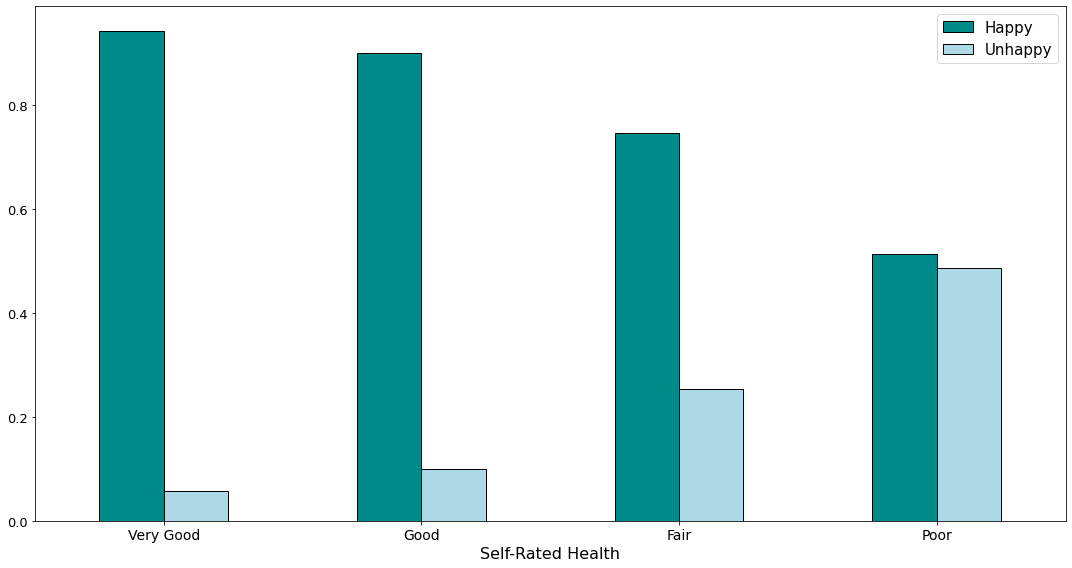

In [26]:
# happiness by health rating going from very good to poor (r = 0.38)

pd.crosstab(happy_correlates['v11'], happy_correlates['v10'], normalize = 'index').plot(kind = 'bar',
                                                                                        color = ['darkcyan', 'lightblue'],
                                                                                        edgecolor = 'black',
                                                                                        figsize=(15,8));
plt.xticks(range(4), ['Very Good', 'Good', 'Fair', 'Poor'], rotation = 0, fontsize = 14)
plt.yticks(fontsize = 13)
plt.xlabel('Self-Rated Health', fontsize = 16);
plt.legend(labels = ['Happy', 'Unhappy'], fontsize = 15)

plt.tight_layout()
plt.savefig('health_happiness.jpeg', dpi = 150)
plt.show();

Here we see that happiness decreases (and unhappiness increases) as self-rated health deteriorates.

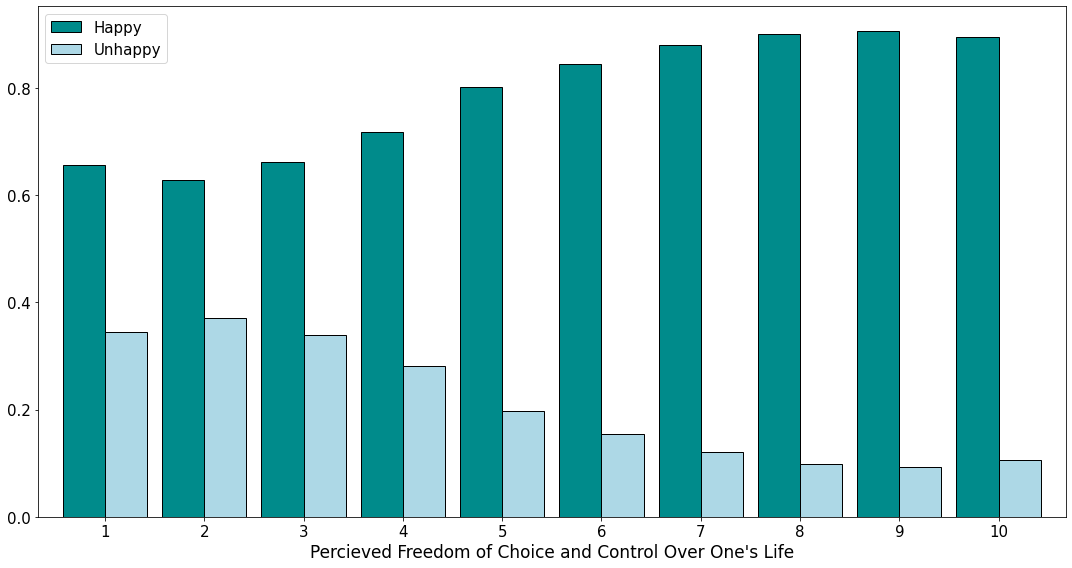

In [27]:
# happiness by perceived freedom of choice (r = -0.23)

pd.crosstab(happy_correlates['v55'], happy_correlates['v10'], normalize = 'index').plot(kind = 'bar',
                                                                                        width = .85,
                                                                                        color = ['darkcyan', 'lightblue'],
                                                                                        edgecolor = 'black',
                                                                                        figsize=(15,8));
plt.xticks(rotation = 0, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Percieved Freedom of Choice and Control Over One's Life", fontsize = 17)
plt.legend(labels = ['Happy', 'Unhappy'], fontsize = 15)

plt.tight_layout()
plt.savefig('choice_happiness.jpeg', dpi = 150)
plt.show();

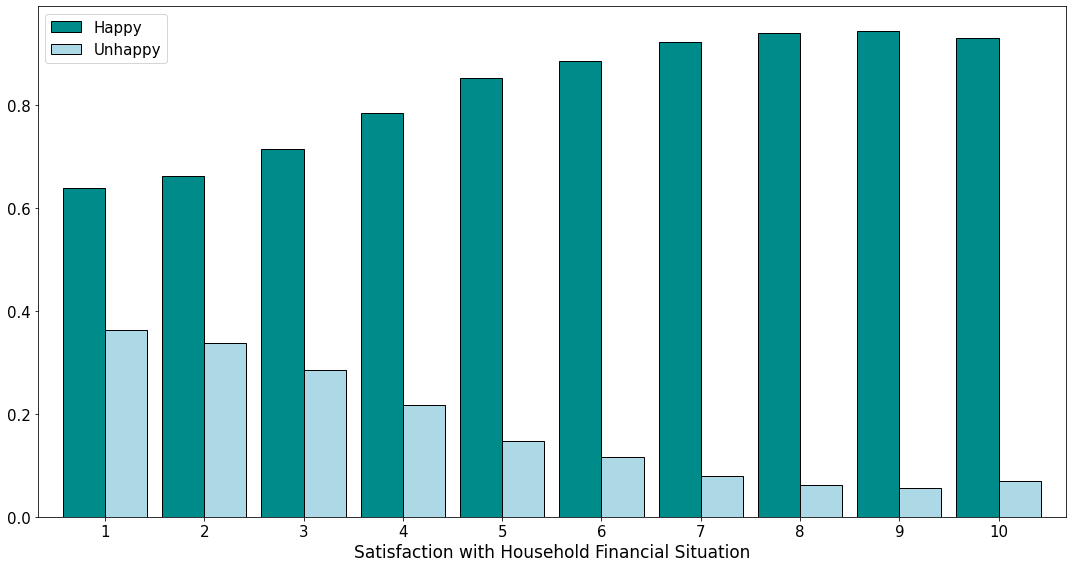

In [28]:
# happiness by satisfaction with household finances (r = -0.30)
pd.crosstab(happy_correlates['v59'], happy_correlates['v10'], normalize = 'index').plot(kind = 'bar',
                                                                                        width = .85,
                                                                                        color = ['darkcyan', 'lightblue'],
                                                                                        edgecolor = 'black',
                                                                                        figsize=(15,8));
plt.xticks(rotation = 0, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Satisfaction with Household Financial Situation", fontsize = 17)
plt.legend(labels = ['Happy', 'Unhappy'], fontsize = 15)

plt.tight_layout()
plt.savefig('financial_situation_happiness.jpeg', dpi = 150)
plt.show();

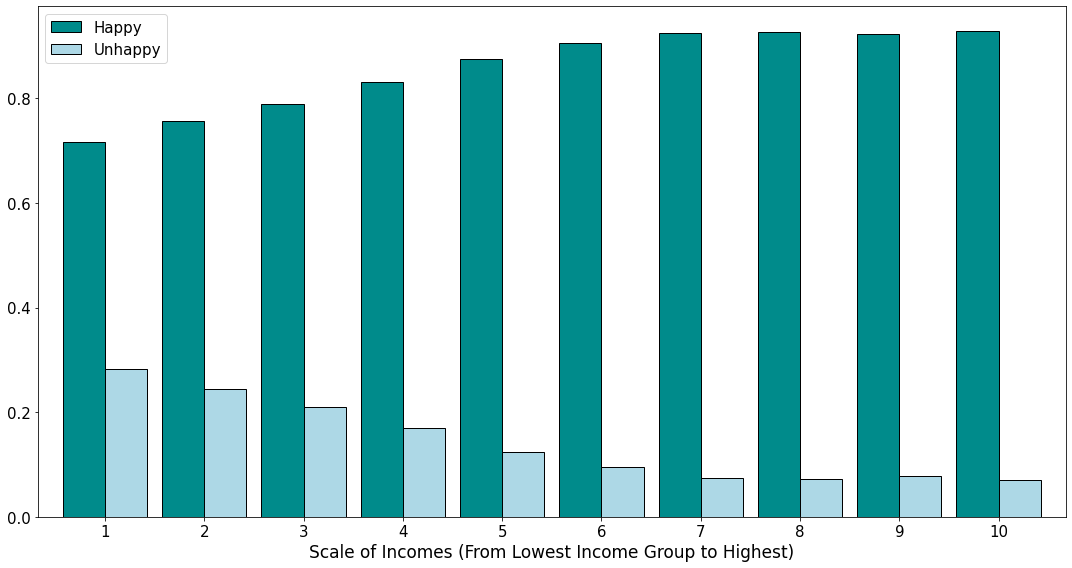

In [29]:
# happiness by satisfaction with household finances (r = -0.30)
pd.crosstab(happy_correlates['v239'], happy_correlates['v10'], normalize = 'index').plot(kind = 'bar',
                                                                                        width = .85,
                                                                                        color = ['darkcyan', 'lightblue'],
                                                                                        edgecolor = 'black',
                                                                                        figsize=(15,8));
plt.xticks(rotation = 0, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Scale of Incomes (From Lowest Income Group to Highest)", fontsize = 17)
plt.legend(labels = ['Happy', 'Unhappy'], fontsize = 15)

plt.tight_layout()
plt.savefig('income_scale_happiness.jpeg', dpi = 150)
plt.show();

As perceived freedom of choice increases, unhappiness decreases. However, happiness ratings start argubably high and stay high, almost regardless of perceptions of freedom of choice. The same pattern is evident for satisfaction with one's household financial situation _and_ people in different income groups. Overall these features shed light on what may influence unhappiness, but not necessarily what influences happiness.

**Logistic Regression Analyses**

In [30]:
#check shapes of X and y to make sure they are what scikit-learn wants
print(X.shape)
print(y.shape)

(82808, 275)
(82808,)


In [31]:
# for classification problems, you'll usually want to stratify based on the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

**Train a simple logistic regression model**

In [32]:
logistic_model = LogisticRegression(max_iter = 5000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

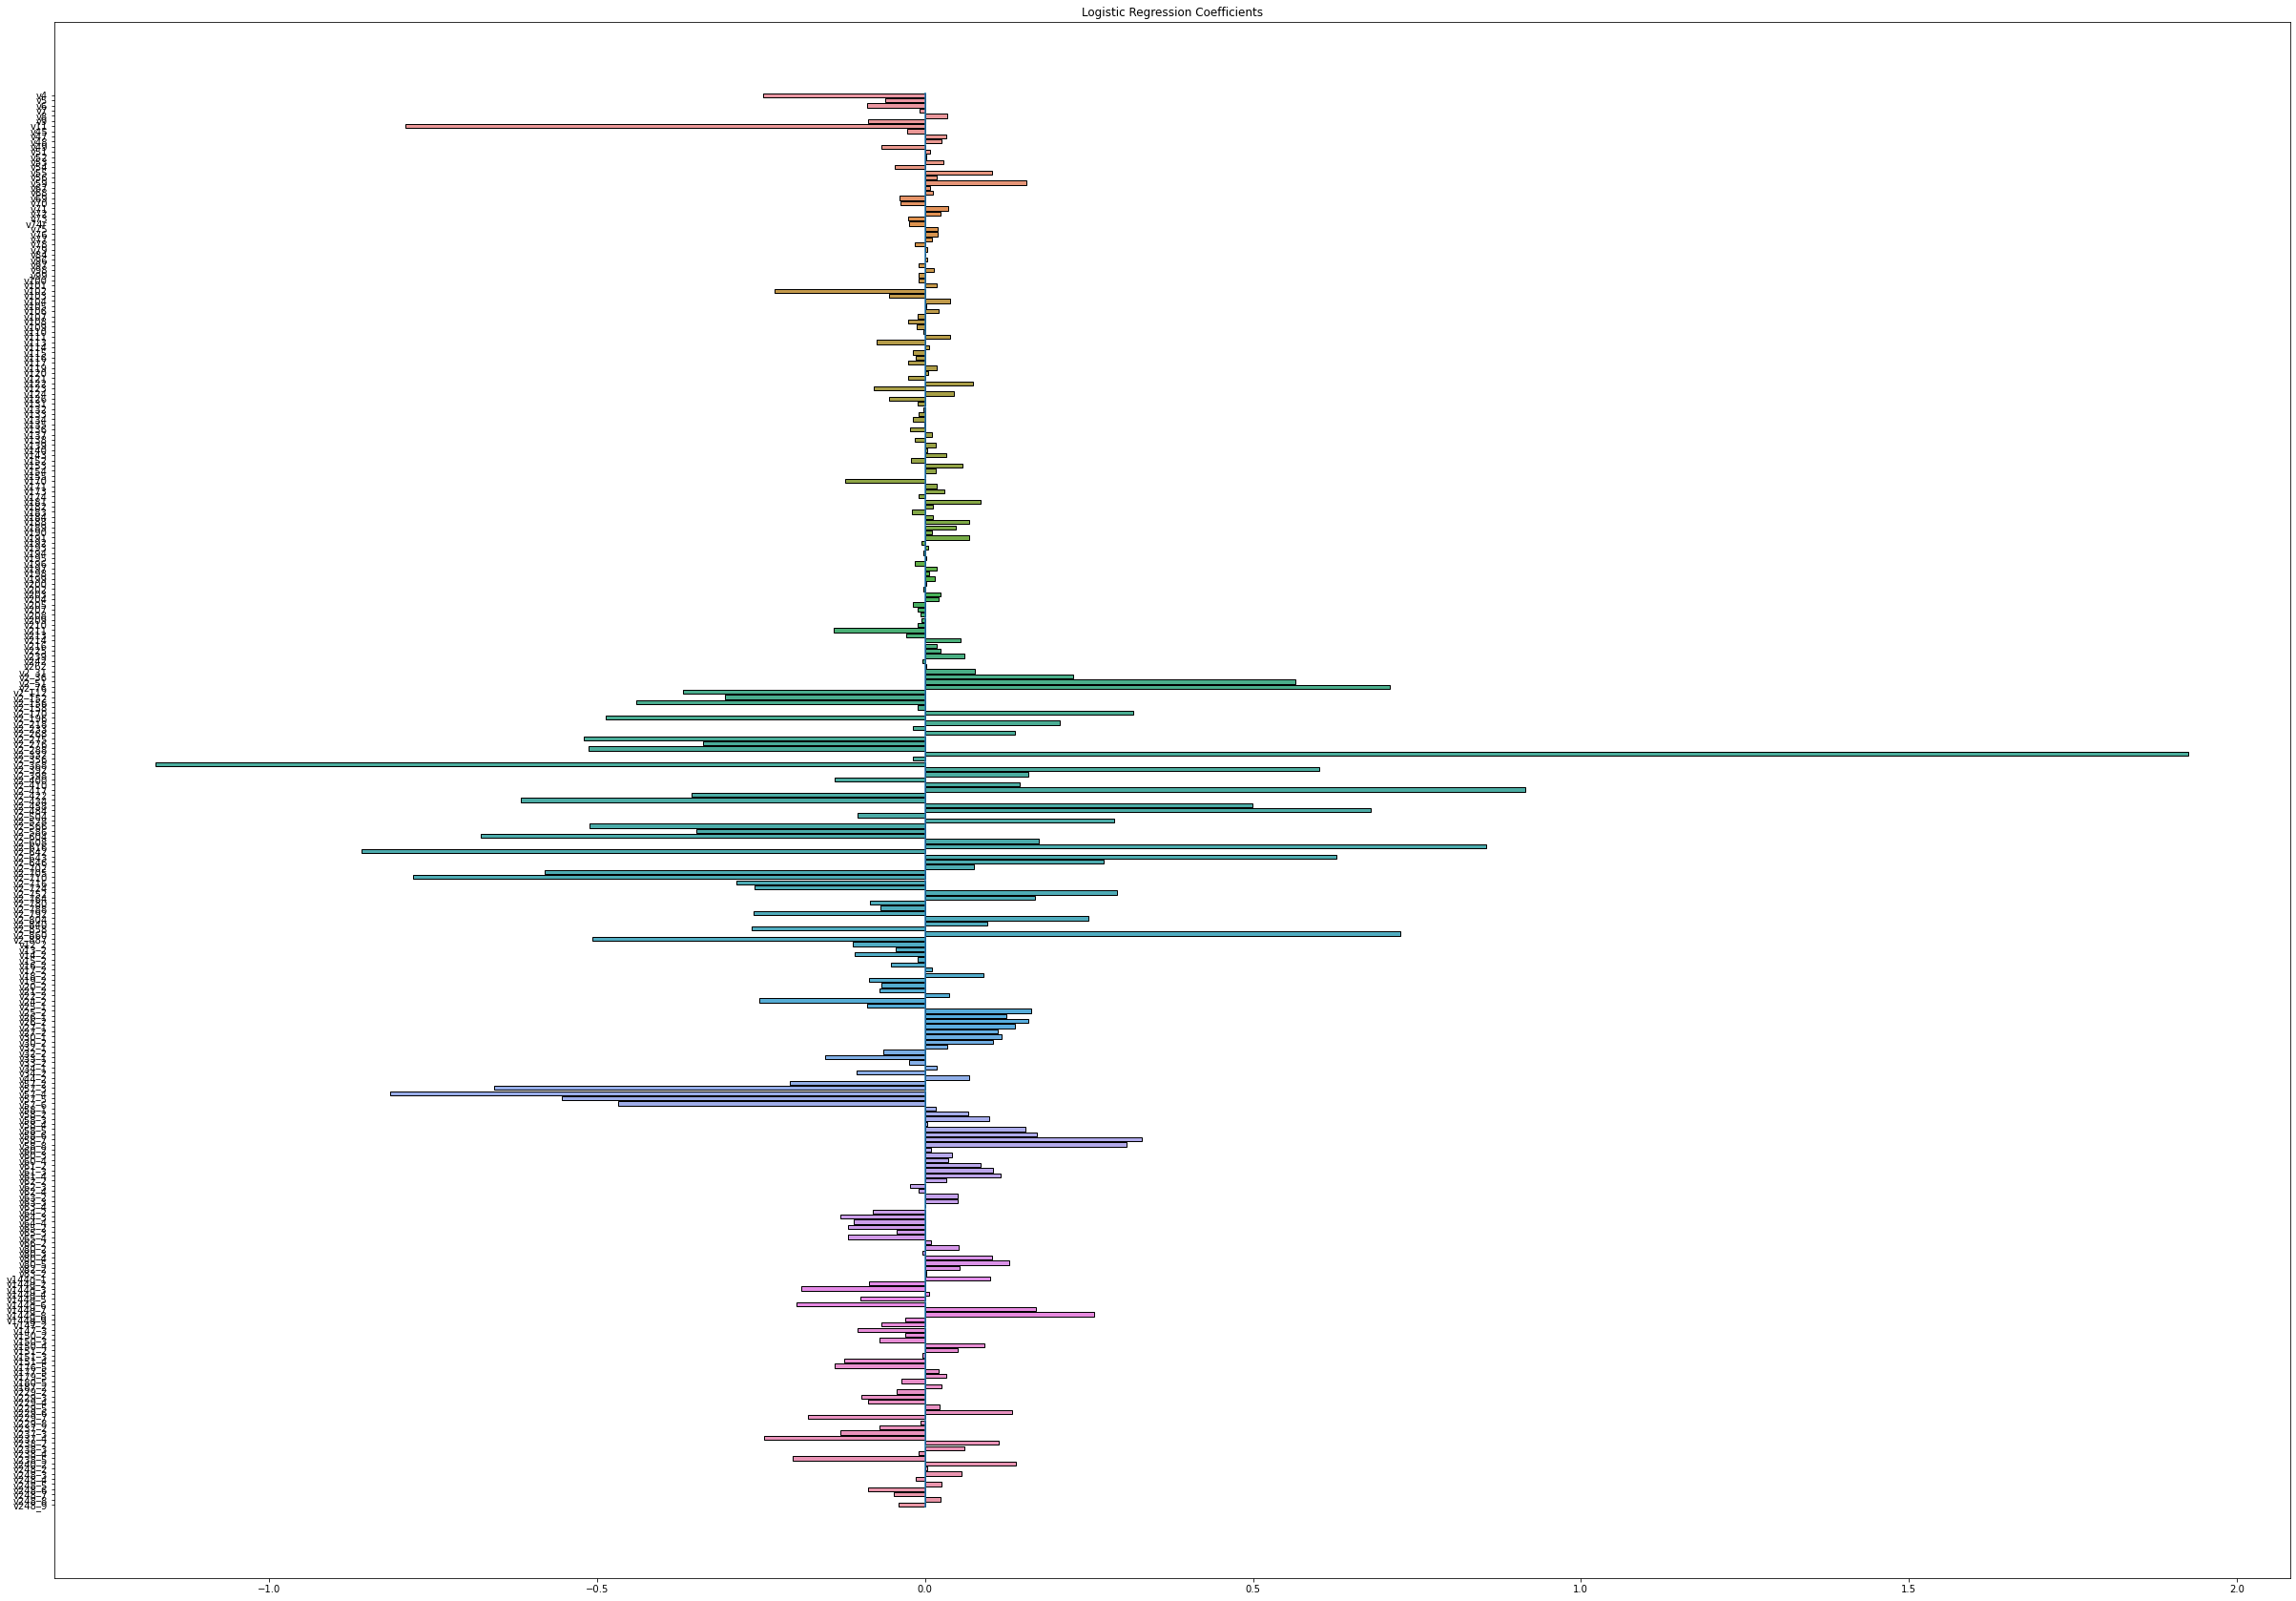

In [33]:
fig, ax = plt.subplots(figsize = (42,30))
sns.barplot(x = logistic_model.coef_[0], y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Logistic Regression Coefficients')

ymin, ymax = plt.ylim()
plt.vlines(x = 0, ymin = ymin, ymax = ymax);

**To Do:**
- Extract and sort coefficients to get top 20

In [34]:
y_pred_prob = logistic_model.predict_proba(X_test)[:,1]

In [35]:
# comparing true classes and predicted probability classes
print(metrics.roc_auc_score(y_test, y_pred_prob))

# simplest model ROC AUC score is 0.8289435975522034

0.8293609714311093


In [36]:
y_pred = logistic_model.predict(X_test)

In [37]:
# check out more quality metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.27      0.39      3076
           1       0.89      0.98      0.93     17626

    accuracy                           0.87     20702
   macro avg       0.78      0.63      0.66     20702
weighted avg       0.85      0.87      0.85     20702



Although this accuracy score is pretty high (87%), this model does an arguably poor job of accurately classifying unhappy respondents (only 67% of true positives in this category as indicated by the precision score). Similarly, the recall score (27%) indicates that this model misclassifies unhappy respondents as happy. There's definite room for improvement here.

F1 score: how do you balance correctly identifying unhappy people as unhappy while not accidentally pulling happy people in?

**Interpretation:**
- ROC AUC score = 0.829 (how well this model classifies respondents)
- precision
    - if this model says that someone is unhappy, it's right 67% of the time (great!)
    - if this model says that someone is happy, it's right 89% of the time (not bad!)
- recall
    - of all actually unhappy respondents in the test set, this model only predicted 27% of them (very bad!)
    - of all actually happy respondents in the test set, this model correctly predicted 98% of them (unimpressive since the classes are imbalanced!)
- accuracy
    - this model correctly identified happy and unhappy respondents 87% of the time (unimpressive since the classes are imbalanced!)
- f1
    - accuracy alternative; 39% accurate when it comes to unhappy respondents
    - accuracy altearnative; 93% accurate when it comes to happy respondents

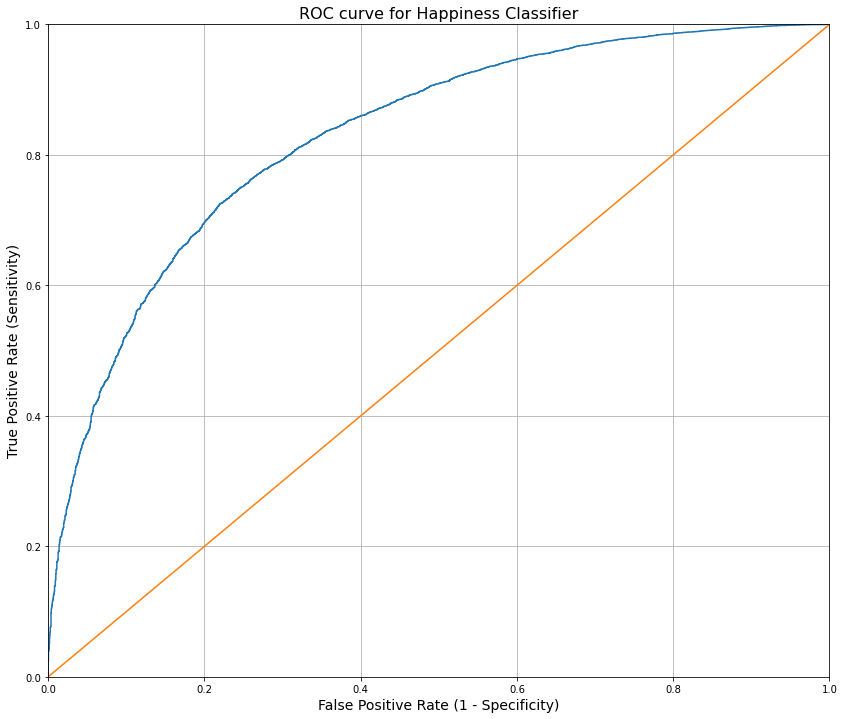

In [38]:
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.figure(figsize = (14,12))

plt.plot(fp_rate, tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Happiness Classifier', fontsize = 16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize = 14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 14)
plt.grid(True)
plt.plot([0,1], [0,1]);

**Logistic regression model with feature scaling, transformations, and regularization**

In [39]:
# standardize feature value ranges
X_columns = X.columns
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = X_columns)

In [40]:
# train test split with standardized predictor variables
X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state = 321, stratify = y)

In [41]:
# calculate high skewness 
skewness = X.skew(axis = 0).to_frame().reset_index()

#rename columns
skewness.columns=['variable','skewness_val']

#identify variables with skewness greater than 1.5 and save them to a list
high_skew = skewness[abs(skewness['skewness_val']) > 1.5].variable.tolist()
print(high_skew)

['v4', 'v8', 'v102', 'v173', 'v174', 'v198', 'v199', 'v200', 'v202', 'v207', 'v208', 'v210', 'v211', 'v2_31', 'v2_36', 'v2_51', 'v2_76', 'v2_112', 'v2_152', 'v2_156', 'v2_158', 'v2_170', 'v2_196', 'v2_218', 'v2_233', 'v2_268', 'v2_275', 'v2_276', 'v2_288', 'v2_332', 'v2_356', 'v2_368', 'v2_392', 'v2_398', 'v2_400', 'v2_410', 'v2_417', 'v2_422', 'v2_434', 'v2_458', 'v2_484', 'v2_504', 'v2_528', 'v2_566', 'v2_586', 'v2_604', 'v2_608', 'v2_616', 'v2_642', 'v2_643', 'v2_646', 'v2_702', 'v2_705', 'v2_710', 'v2_716', 'v2_724', 'v2_752', 'v2_764', 'v2_780', 'v2_788', 'v2_792', 'v2_804', 'v2_840', 'v2_858', 'v2_860', 'v2_887', 'v25_1', 'v25_2', 'v26_1', 'v26_2', 'v27_1', 'v27_2', 'v30_1', 'v30_2', 'v32_1', 'v32_2', 'v33_1', 'v33_2', 'v34_1', 'v34_2', 'v44_2', 'v57_2', 'v57_3', 'v57_4', 'v57_5', 'v58_1', 'v58_3', 'v58_4', 'v58_5', 'v58_6', 'v58_7', 'v58_8', 'v60_2', 'v60_3', 'v60_4', 'v62_2', 'v62_4', 'v63_4', 'v64_2', 'v64_3', 'v64_4', 'v65_3', 'v80_2', 'v80_3', 'v80_4', 'v80_5', 'v82_2', 'v83

In [42]:
# retain only variables that are not dummies
high_skew = ['v4', 'v8', 'v102', 'v173', 'v174', 'v198', 'v199', 'v200', 'v202', 'v207', 'v208', 'v210', 'v211']

In [43]:
# Apply column transformer to variables that are highly skewed
ct = ColumnTransformer(transformers = [
    ('yeo-johnson', PowerTransformer(method = 'yeo-johnson', standardize = True), high_skew[1:]),
], remainder = 'passthrough')

In [44]:
pipe = Pipeline(steps = [
    ('transform', ct),
    ('logreg', LogisticRegression(penalty = 'elasticnet', 
                                  #class_weight = 'balanced', 
                                  solver = 'saga', 
                                  max_iter = 5000, 
                                  l1_ratio = 1)) # change from 0.5 to 1
])
# when l1_ratio = .5, lasso and ridge penalty are both .5
# when l1_ration = 1, this means full lasso penalty and no ridge penalty

In [45]:
model = pipe.fit(X_train, y_train)

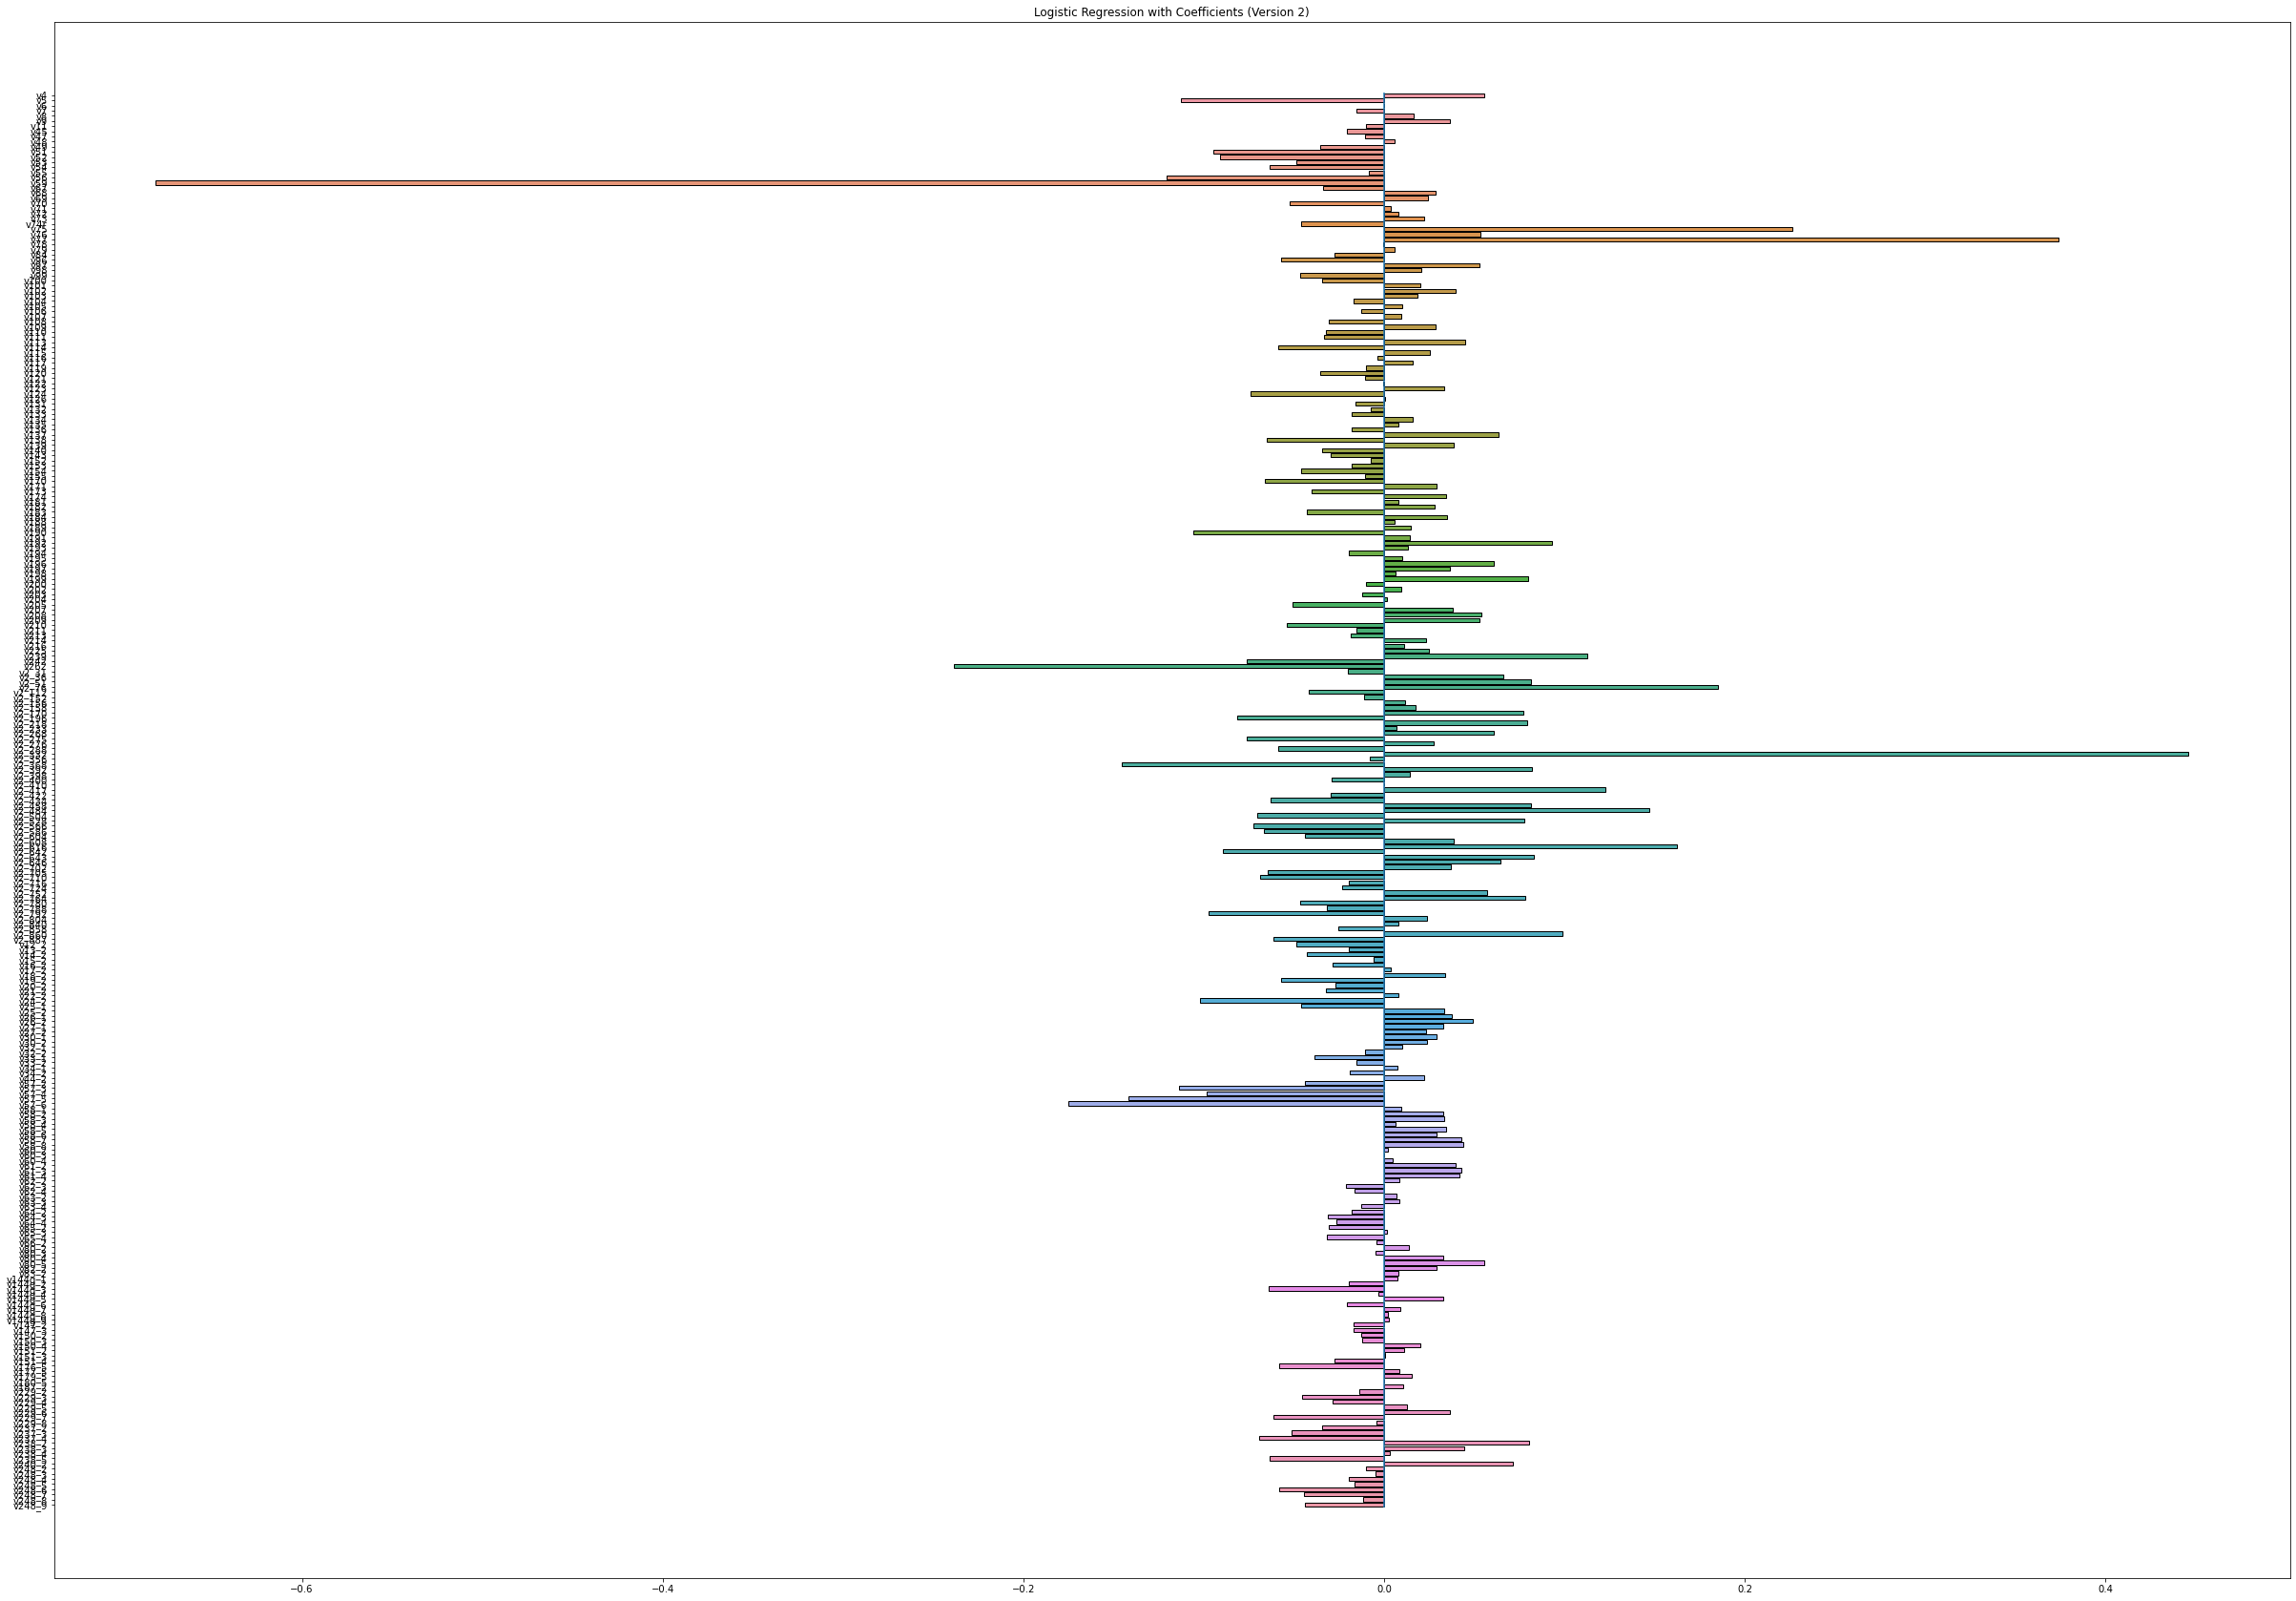

In [46]:
fig, ax = plt.subplots(figsize = (42,30))
sns.barplot(x = pipe.named_steps['logreg'].coef_[0], y = list(X.columns), ax = ax, edgecolor = 'black')
plt.title('Logistic Regression with Coefficients (Version 2)')

ymin, ymax = plt.ylim()
plt.vlines(x = 0, ymin = ymin, ymax = ymax);

In [47]:
y_pred_prob = model.predict_proba(X_test)[:,1]

In [48]:
# comparing true classes and predicted probability classes
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.830188009511897


In [49]:
y_pred = logistic_model.predict(X_test)

In [50]:
# check out all quality metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.79      0.35      3076
           1       0.94      0.53      0.68     17626

    accuracy                           0.57     20702
   macro avg       0.58      0.66      0.52     20702
weighted avg       0.83      0.57      0.63     20702



In [51]:
# view top coefficients
coef_df = pd.DataFrame({'coefficient': pipe.named_steps['logreg'].coef_[0],
                       'variable': X.columns})

In [52]:
coef_df.head()

,coefficient,variable
0,0.055418,v4
1,-0.112483,v5
2,0.000000,v6
3,-0.015405,v7
4,0.016509,v8


In [53]:
coef_df.sort_values('coefficient')

,coefficient,variable
17,-0.680942,v59
111,-0.238577,v262
196,-0.175188,v57_6
130,-0.145657,v2_368
195,-0.141769,v57_5
16,-0.120784,v56
193,-0.113739,v57_3
1,-0.112483,v5
85,-0.105971,v190
176,-0.102279,v24_2


In [54]:
coef_df.reindex(coef_df.coefficient.abs().sort_values(ascending=False).index)

,coefficient,variable
17,-0.680942,v59
128,0.445783,v2_332
28,0.374017,v77
111,-0.238577,v262
26,0.226344,v75
115,0.184936,v2_76
196,-0.175188,v57_6
146,0.162253,v2_616
139,0.146850,v2_484
130,-0.145657,v2_368


In [55]:
# # happiness by number of children
# pd.crosstab(X['v58'], y, normalize = 'index').plot(kind = 'bar', edgecolor = 'black')
# #plt.xticks(range(4), ['Very Good', 'Good', 'Fair', 'Poor'], rotation = 0)
# plt.xlabel('Marital Status - Single', fontsize=14)
# plt.legend(labels = ['Happy', 'Unhappy']);

# # this cell won't run when v58 has been converted into a dummy variable

In [138]:
pd.crosstab(X['v2_710'], y, normalize = 'index')

v10,1,0
v2_332,,
0,0.851594,0.148406
1,0.844689,0.155311


In [57]:
# coef_df2 = pd.DataFrame({'coefficient': pipe.named_steps['logreg'].coef_[0],
#                        'variable': X.columns})

In [58]:
# coef_df2.sort_values('coefficient')

Play around with class_weight options (on outcome variable)

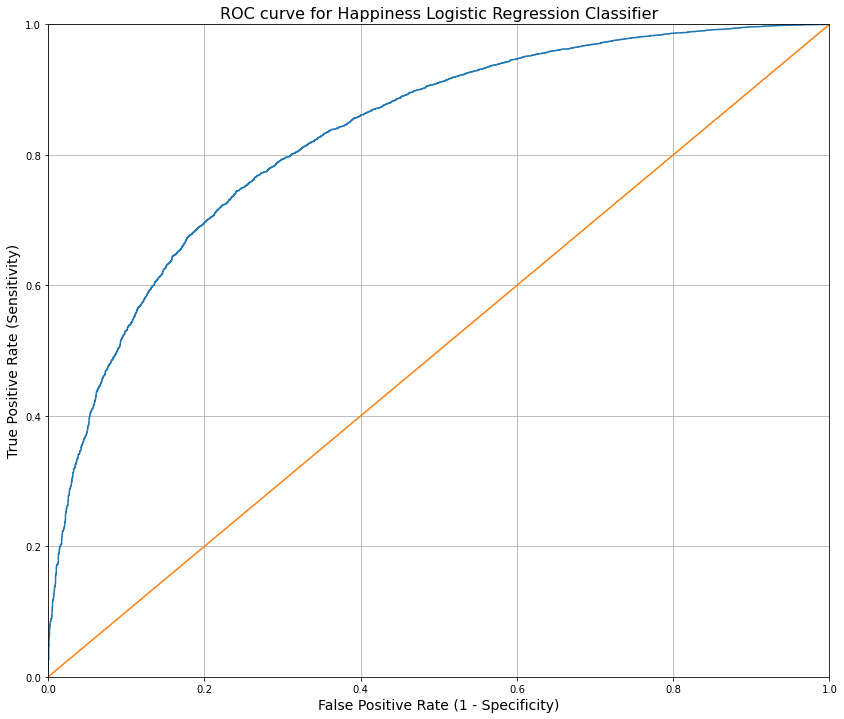

In [59]:
fp_rate, tp_rate, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.figure(figsize = (14,12))

plt.plot(fp_rate, tp_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Happiness Logistic Regression Classifier', fontsize = 16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize = 14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 14)
plt.grid(True)
plt.plot([0,1], [0,1]);

### Random Forest Algorithm

In [60]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_absolute_error, mean_squared_error
#from sklearn.ensemble import RandomForestClassifier

In [61]:
# define dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [62]:
# # tune the class weights
# # only need to do this once
# clf = RandomForestClassifier()
# params = {'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.5)]}
# gs = GridSearchCV(estimator=clf, param_grid=params, cv=5)
# gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 1.0, 1: 1}, {0: 1.5, 1: 1},
                                          {0: 2.0, 1: 1}, {0: 2.5, 1: 1},
                                          {0: 3.0, 1: 1}, {0: 3.5, 1: 1},
                                          {0: 4.0, 1: 1}, {0: 4.5, 1: 1}]})

In [63]:
# # also only necessary once
# gs.best_params_

{'class_weight': {0: 1.0, 1: 1}}

In [64]:
# rf = RandomForestClassifier(class_weight = {0: 20, # 4x as much penalty for misclassifying unhappy respondents
#                                             1: 1},
#                             random_state = 321).fit(X_train, y_train)

In [65]:
# rf = RandomForestClassifier(n_estimators = 250, # make 250 trees
#                             max_depth = 3, # make more shallow trees
#                             random_state = 321).fit(X_train, y_train)

In [66]:
# y_pred = rf.predict(X_test)

In [67]:
# y_pred_prob = rf.predict_proba(X_test)[:,1]

In [68]:
# print(metrics.roc_auc_score(y_test, y_pred_prob))

In [69]:
# print(metrics.classification_report(y_test, y_pred))

In [70]:
clf = RandomForestClassifier(random_state = 321,
                             class_weight = {0: 1.0,
                                             1: 1},
                             n_estimators = 250, # make 250 trees
                             max_depth = 3).fit(X_train, y_train)

In [71]:
y_pred = clf.predict(X_test)

In [72]:
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [73]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7967421210420769


In [74]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3076
           1       0.85      1.00      0.92     17626

    accuracy                           0.85     20702
   macro avg       0.43      0.50      0.46     20702
weighted avg       0.72      0.85      0.78     20702



C:\Users\ocnra\anaconda3\envs\umap\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ocnra\anaconda3\envs\umap\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ocnra\anaconda3\envs\umap\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
coef_rf_df = pd.DataFrame({'importance': clf.feature_importances_,
                        'variable': X.columns})
coef_rf_df

,importance,variable
0,0.012926,v4
1,0.025039,v5
2,0.014680,v6
3,0.003197,v7
4,0.001465,v8
5,0.000129,v9
6,0.171034,v11
7,0.000187,v45
8,0.000000,v47
9,0.000000,v48


In [76]:
coef_rf_df.sort_values('importance', ascending = False)

,importance,variable
6,0.171034,v11
17,0.140187,v59
15,0.073104,v55
109,0.068517,v239
265,0.052311,v238_5
86,0.046674,v191
85,0.041901,v190
83,0.038180,v188
232,0.030628,v144g_3
104,0.029374,v211


In [77]:
rf_feat_imp = coef_rf_df.reindex(coef_rf_df.importance.abs().sort_values(ascending=False).index).head(10)
rf_feat_imp

,importance,variable
6,0.171034,v11
17,0.140187,v59
15,0.073104,v55
109,0.068517,v239
265,0.052311,v238_5
86,0.046674,v191
85,0.041901,v190
83,0.038180,v188
232,0.030628,v144g_3
104,0.029374,v211


In [78]:
# try extra trees regressor and/or gradient boosting to see if either performs better

**Random Forest with Random Undersampling**  
AKA "Balanced Random Forest" classifier  
- performs random undersampling of the majority class in reach bootstrap sample  

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier

In [80]:
# generate dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [81]:
# define model
model = BalancedRandomForestClassifier(n_estimators=10)

In [82]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=321)

In [83]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [84]:
from numpy import mean

# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.759


**AdaBoost algorithm**  
- creating balanced samples of the training dataset by selecting all examples from the minority class and a subset from the majority class

In [85]:
from imblearn.ensemble import EasyEnsembleClassifier

In [113]:
# generate dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [114]:
# define model
ada_boost = EasyEnsembleClassifier(n_estimators=10)

In [88]:
# define evaluation procedure
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=321)

In [89]:
# evaluate model
#scores = cross_val_score(ada_boost, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [90]:
# summarize performance
#print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.823


In [115]:
ada_boost = ada_boost.fit(X_train, y_train)

In [116]:
y_pred = ada_boost.predict(X_test)

In [117]:
y_pred_prob = ada_boost.predict_proba(X_test)[:,1]

In [118]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8246176940850325


In [119]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.73      0.47      3076
           1       0.94      0.76      0.84     17626

    accuracy                           0.76     20702
   macro avg       0.65      0.75      0.66     20702
weighted avg       0.85      0.76      0.79     20702



**Interpretation:**  
- ROC AUC score = 0.825 (how well this model classifies respondents)  
  
- precision
    - if this model says that someone is unhappy, it's right 35% of the time (bad!)
    - if this model says that someone is happy, it's right 94% of the time (great!)
- recall
    - of all actually unhappy respondents in the test set, this model only labeled 73% of them (not bad!)
    - of all actually happy respondents in the test set, this model correctly labeled 76% of them (meh...seems like this model operates in favor of correctly detecting unhappy respondents)
- accuracy
    - this model correctly identified happy and unhappy respondents 76% of the time (this makes sense in light of the fact that happy respondents were deliberately undersampled)
- f1
    - accuracy alternative; 47% accurate when it comes to unhappy respondents
    - accuracy altearnative; 84% accurate when it comes to happy respondents

In [105]:
ada_boost_importances_df = pd.DataFrame({'importance': ada_boost.feature_importances_,
                        'variable': X.columns})
ada_boost_importances_df

AttributeError: 'EasyEnsembleClassifier' object has no attribute 'feature_importances_'

In [129]:
# obtain feature importances for 1st adaboost model in the ensemble
_ = ada_boost.estimators_[0][1]

In [131]:
ada_boost_feat_imps = pd.DataFrame(_.feature_importances_)

In [133]:
ada_boost_importances_df = pd.DataFrame({'importance': ada_boost.estimators_[0][1].feature_importances_,
                        'variable': X.columns})
ada_boost_importances_df

,importance,variable
0,0.02,v4
1,0.04,v5
2,0.02,v6
3,0.00,v7
4,0.00,v8
5,0.00,v9
6,0.08,v11
7,0.00,v45
8,0.00,v47
9,0.00,v48


In [139]:
pd.crosstab(X['v2_710'], y, normalize = 'index')

v10,1,0
v2_710,,
0,0.854712,0.145288
1,0.777683,0.222317


In [142]:
ada_boost.estimators_[0]

Pipeline(steps=[('sampler', RandomUnderSampler(random_state=803999969)),
                ('classifier', AdaBoostClassifier(random_state=427327221))])

In [143]:
# create a for loop to add up feature importances for all models in adaboost ensemble

for i, pipe in enumerate(ada_boost.estimators_):
    
    if i == 0:
        added_up_importances = pd.DataFrame({'importance': pipe[1].feature_importances_,
                                             'variable': X.columns})
    elif i > 0:
        added_up_importances['importance'] =  pipe[1].feature_importances_ + added_up_importances['importance']

In [137]:
ada_boost_importances_df.sort_values('importance', ascending = False).head(10)

,importance,variable
6,0.08,v11
17,0.08,v59
15,0.06,v55
128,0.04,v2_332
86,0.04,v191
1,0.04,v5
38,0.04,v102
48,0.02,v113
122,0.02,v2_218
121,0.02,v2_196


In [144]:
added_up_importances.sort_values('importance', ascending = False)

,importance,variable
6,0.84,v11
17,0.80,v59
15,0.42,v55
38,0.30,v102
111,0.30,v262
75,0.26,v170
128,0.24,v2_332
1,0.24,v5
83,0.22,v188
265,0.22,v238_5


### Partial dependency plot

In [145]:
from sklearn.inspection import plot_partial_dependence
from ipywidgets import interact

In [151]:
@interact(variable = X.columns, show_points = False)
def make_pdp(variable, show_points):
    fig, ax = plt.subplots(figsize = (12,8))

    plot_partial_dependence(estimator = ada_boost,
                            X = X.sample(1000), features = [variable], 
                            line_kw = {'linewidth': 3, 'color': 'red'},
                           ax = ax)
    
    if show_points:
        plt.scatter(X[variable], y, alpha = 0.25, zorder = -5, edgecolor = 'black');

interactive(children=(Dropdown(description='variable', options=('v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v11', 'v4…

## AdaBoost with sklearn

In [104]:
from sklearn.ensemble import AdaBoostClassifier
import shap

In [106]:
# generate dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321, stratify = y)

In [107]:
# define model
model = AdaBoostClassifier(n_estimators = 10)

In [ ]:
# # define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=321)

In [ ]:
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [108]:
ada_boost = model.fit(X_train, y_train)

In [109]:
y_pred = ada_boost.predict(X_test)

In [110]:
y_pred_prob = ada_boost.predict_proba(X_test)[:,1]

In [111]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7851547439155155


In [112]:
# sklearn adaboost
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.26      0.35      3076
           1       0.88      0.96      0.92     17626

    accuracy                           0.86     20702
   macro avg       0.71      0.61      0.64     20702
weighted avg       0.83      0.86      0.84     20702



In [ ]:
ada_boost_importances_df = pd.DataFrame({'importance': ada_boost.feature_importances_,
                        'variable': X.columns})
ada_boost_importances_df

### Model Interpretability

In [101]:
#%conda install -c conda-forge shap

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ocnra\anaconda3\envs\umap

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cloudpickle-1.6.0          |             py_0          22 KB  conda-forge
    shap-0.39.0                |   py39h2e25243_0         562 KB  conda-forge
    slicer-0.0.7               |     pyhd8ed1ab_0          16 KB  conda-forge
    tqdm-4.61.0                |     pyhd8ed1ab_0          80 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         680 KB

The following NEW packages will be INSTALLED:

  cloudpickle        conda-forge/noarch::cloudpickle-1.6.0-py_0
  shap               conda-forge/win-64::shap-0.39.0-py39h2e25243_0
  slicer             conda-forge/noarch::slicer-0.0.7-pyhd8ed1ab_0
  tqdm  

In [102]:
# import shap

shap.initjs()     #Load Javascript so that we can view the force plots.

In [103]:
explainer = shap.TreeExplainer(ada_boost) # do predictions for this particular model
shap_values = explainer.shap_values(X) # provide predictor values; provide training data, but can use test data too

Exception: Model type not yet supported by TreeExplainer: <class 'imblearn.ensemble._easy_ensemble.EasyEnsembleClassifier'>

In [ ]:
observation_idx = 2 # second observation in dataset; check out others

shap.force_plot(explainer.expected_value, shap_values[observation_idx,:], X.iloc[observation_idx,:])

In [ ]:
# is it possible to create a subplot 